
A. 데이터 마이닝과 텍스트 마이닝

1) 데이터 마이닝

① 데이터에서 의미있는 정보를 추출하는 기술

② 고급 통계 분석과 모델링 기법을 적용하여 데이터 안의 패턴과 관계를 찾아내는 과정

2) 텍스트 마이닝

① 비정형 텍스트 데이터에서 분석 도구를 이용하여 패턴을 탐구하여 새롭고 의미있는 정보를 찾아내는 과정 또는 기술

② 비정형 텍스트 데이터를 정형화 및 특징을 추출하는 과정이 요구됨

③ 자연어 처리 기술에 기반한 텍스트 데이터 가공 기술

④ 모든 문서의 단어들을 하나하나의 변수로 보기 때문에 변수의 갯수가 매우 많아지게 됨.  즉, 일반적인 데이터마이닝에 비해 데이터의 차원이 훨씬 커지게 됨.


텍스트분류\
감정분석\
텍스트 생성(chatGPT)\
텍스트 요약\
토빅 모델링

In [ ]:
#말뭉치(코퍼스, corpus) : 텍스트마이닝에 적용되는 텍스트 데이터 집합

#사전 처리

#대소문자 통일

#영문 텍스트 데이터는 대문자 또는 소문자로 변환하는 것이 좋음(보통 소문자로 변경)

s="Hello World"

print(s.lower()) #소문자로 변환

print(s.upper()) #대문자로 변환

In [ ]:
#숫자, 문장부호, 특수문자 제거

# 단어가 아니기 때문에 분석에 불필요한 경우가 대부분임

# 삭제할 경우 분석 결과가 왜곡된다고 생각될 경우 남겨둘 필요도 있음

# 날짜,수치,백분율 등의 숫자는 각각의 문장에서는 의미가 있지만

# 전체 문서 집합에서는 크게 의미가 없는 경우가 많으므로 지우는 것이 일반적

import re

#숫자 제거

p=re.compile("[0-9]+")

result=p.sub("","올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다")

print(result)

In [ ]:
# . , ? ! 등의 문장부호들은 삭제하는 것이 일반적

# 각 문장에서는 특수한 역할을 수행할 수 있으나

# 전체 말뭉치의 관점에서는 의미를 부여하기 어려운 경우가 대부분임.

# - ( ) 등의 특수문자도 보통 삭제함

import re

def clean_text(input_data):

    #텍스트에 포함되어 있는 숫자와 특수문자 제거

    p=re.compile("[0-9_!@#$%^&*]")

    result=p.sub("",input_data)
    
    return result

txt = "올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123"

print(txt)

print(clean_text(txt))

In [ ]:
#불용어 처리

#불용어 : 빈번하게 사용되지만 구체적인 의미를 찾기 어려운 단어들

#영어의 경우 the, a, an 등의 관사는 많이 사용되지만

#텍스트마이닝에서는 특별한 의미를 부여하기 힘든 경우가 많음

#NLTK : 파이썬에서 많이 사용되는 텍스트마이닝 패키지

# 언어별로 불용어 리스트 제공, *한국어는 지원하지 않음

# 한국어 불용어 리스트를 제공하는 패키지는 아직 없으며

# 직접 만들거나 다른 분석가들이 작성한 리스트를 활용해야 함

words=["추석","연휴","민족","대이동","시작","늘어","교통량","교통사고","특히","자동차", "고장","상당수","나타","것","기자"]

#불용어

stopwords=["가다","늘어","나타","것","기자"]

#불용어 제거

[i for i in words if i not in stopwords]

In [ ]:
#영어 불용어 처리

import nltk

nltk.download("stopwords")

from nltk.corpus import stopwords

words=["chief","justice","roberts",",","president","carter",",","president","clinton","president","bush","obama","fellow","americans","and","people","of","the","world","thank","you"]

[w for w in words if not w in stopwords.words("english")]

In [ ]:
import nltk

nltk.download("punkt") #문장 tokenizer 다운로드

In [ ]:
#어근 동일화 처리 : 비슷한 어근 처리(stemming)
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

stm = PorterStemmer()

txt="cook cooker cooking cooks cookery"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

In [ ]:
stm=PorterStemmer()

#어근이 동일한 키워드 정리

txt="pythoning pythons Python pythoners pythoned"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

In [ ]:
#LancasterStemmer : PorterStemmer와 비슷하지만 좀더 나은 성능

from nltk.stem.lancaster import LancasterStemmer

stm=LancasterStemmer()

txt="cook cooker cooking cooks cookery"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

In [ ]:
stm=LancasterStemmer()

txt="pythoning pythons Python pythoners pythoned"

words=word_tokenize(txt)

for w in words:
    print(stm.stem(w),end=" ")

In [ ]:
#Porter나 Lancaster가 처리하지 못하는 경우에는

#RegexpStemmer를 사용하여 특정한 표현식을 일괄적으로 제거함

from nltk.stem.regexp import RegexpStemmer

stm = RegexpStemmer('ing')

print(stm.stem('cooking'))

print(stm.stem('cookery'))

print(stm.stem('ingleside'))

In [ ]:
stm=RegexpStemmer("python")

txt="pythoning pythons Python pythoners pythoned"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")



In [ ]:
# N-gram : n번 연이어 등장하는 단어들의 연쇄

# 2회 바이그램, 3회 트라이그램, 보편적으로 영어에만 적용되며 바이그램이 주로 사용됨

txt = 'Hello'

# 2-gram이므로 문자열의 끝에서 한 글자 앞까지만 반복함

for i in range(len(txt) - 1):            

    # 현재 문자와 그다음 문자 출력

    print(txt[i], txt[i + 1], sep='') 

In [ ]:
txt = 'this is python script'

# 공백을 기준으로 문자열을 분리하여 리스트로 저장

words = txt.split()                

# 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함

for i in range(len(words) - 1):      

    # 현재 문자열과 그다음 문자열 출력
    print(stm.stem(w),end=" ")

In [ ]:
#Porter나 Lancaster가 처리하지 못하는 경우에는

#RegexpStemmer를 사용하여 특정한 표현식을 일괄적으로 제거함

from nltk.stem.regexp import RegexpStemmer

stm = RegexpStemmer('ing')

print(stm.stem('cooking'))

print(stm.stem('cookery'))

print(stm.stem('ingleside'))

In [ ]:
stm=RegexpStemmer("python")

txt="pythoning pythons Python pythoners pythoned"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

In [ ]:
# N-gram : n번 연이어 등장하는 단어들의 연쇄

# 2회 바이그램, 3회 트라이그램, 보편적으로 영어에만 적용되며 바이그램이 주로 사용됨

txt = 'Hello'

# 2-gram이므로 문자열의 끝에서 한 글자 앞까지만 반복함

for i in range(len(txt) - 1):            

    # 현재 문자와 그다음 문자 출력

    print(txt[i], txt[i + 1], sep='')

In [ ]:
txt = 'this is python script'

# 공백을 기준으로 문자열을 분리하여 리스트로 저장

words = txt.split()                

# 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함

for i in range(len(words) - 1):      

    # 현재 문자열과 그다음 문자열 출력
     print(words[i], words[i + 1])

In [ ]:
txt = 'hello'

two_gram = zip(txt, txt[1:])

for i in two_gram:

    print(i[0], i[1], sep='')

In [ ]:
txt = 'this is python script'

words = txt.split()

list(zip(words, words[1:]))

In [ ]:
from nltk import ngrams

sentence="I love you.  Good morning.  Good bye."

grams=ngrams(sentence.split(),2)

for gram in grams:

    print(gram,end=" ")

In [ ]:
sentence="I love you.  Good morning.  Good bye."

grams=ngrams(sentence.split(),3)

for gram in grams:

    print(gram,end=" ")

In [ ]:
#한국어 처리

#헌법 말뭉치
from konlpy.corpus import kolaw

#말뭉치에 포함된 파일 목록

print(kolaw.fileids())

c = kolaw.open('constitution.txt').read()
print(c[:40])

In [ ]:
#국회의안 말뭉치

from konlpy.corpus import kobill

print(kobill.fileids())

d = kobill.open('1809890.txt').read()

print(d[:40])

In [ ]:
#품사 분석

# POS 태깅(Part-Of-Speech)

# 모든 언어에 명사,동사,형용사,부사는 공통적으로 존재함

#한나눔 패키지 - KAIST Semantic Web Research Center 개발

#    http://semanticweb.kaist.ac.kr/hannanum/

#pip install konlpy

#pip install tweepy==3.10.0

#pip install jpype1==1.0.2

#jdk8 버전 설치(java 최신버전은 잘 호환되지 않을 수 있음)

from konlpy.tag import Hannanum

han=Hannanum()

txt="""원/달러 환율이 3년 5개월 만에 최고치로 마감하고,

위안화 환율이 11년 만에 달러당 7위안을 넘었다.

원/엔 재정환율 역시 100엔당 30원 가까이 뛰었다."""

#형태소 분석

print(han.morphs(txt))

In [ ]:
print(han.nouns(txt)) #명사 추출

In [ ]:
#형태소와 품사

print(han.pos(txt))
print(han.tagset) #품사 목록

In [ ]:
#꼬꼬마 패키지 - 서울대학교 IDS(Intelligent Data Systems) 연구실 개발

#    http://kkma.snu.ac.kr/

from konlpy.tag import Kkma

kkm=Kkma()

print(kkm.morphs(txt)) #형태소 분석

In [ ]:
print(kkm.nouns(txt))

In [ ]:
print(kkm.pos(txt))

In [ ]:
print(kkm.tagset) #품사 목록

In [ ]:
#트위터 패키지 - 트위터에서 개발, 2017년 이후 오픈코리안텍스트로 이름이 바뀜

#  https://github.com/twitter

from konlpy.tag import Okt

okt=Okt()

print(okt.morphs(txt)) #형태소 분석

In [ ]:
print(okt.nouns(txt))

In [ ]:
print(okt.pos(txt))

In [ ]:
print(okt.tagset)

In [ ]:
#어구 추출

print(okt.phrases(txt))

In [ ]:
#단어 출현 빈도

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from nltk import Text

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


plt.figure(figsize=(20,6))
kolaw = Text(okt.nouns(c), name="kolaw")  # 뭐하는것?
kolaw.plot(30)
plt.show()

In [ ]:
# 에러가 발생할 경우 

# visual studio 재배포 패키지 설치 후 (vc_redist_x64.exe)

# https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud

# python 버전에 맞는 whl 파일 다운로드

# 로컬디렉토리에 있는 파일로 설치

# pip install wordcloud-버전-cp39-cp39-win_amd64.whl

from wordcloud import WordCloud

font_path = 'c:/windows/fonts/malgun.ttf'

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)

plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))

plt.axis("off")

plt.show()

In [ ]:
#영어 품사 분석

import nltk

nltk.download("averaged_perceptron_tagger")

In [ ]:
from nltk import pos_tag

a="I love you."

tags=pos_tag(a.split())

print(tags)

In [ ]:
import urllib

import re

from bs4 import BeautifulSoup

from nltk.corpus import stopwords  

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(20,16)

plt.rcParams["font.size"]=15

res=urllib.request.urlopen('http://python.org/')

html=res.read()

#알파벳,숫자,_ 문자들만 선택

tokens=re.split('\W+',html.decode('utf-8'))

clean=BeautifulSoup(html,'html.parser').get_text()  

tokens=[token for token in clean.split()]

stop=set(stopwords.words('english'))

clean_tokens= [token for token in tokens

               if len(token.lower())>1 and (token.lower() not in stop)]

tagged=nltk.pos_tag(clean_tokens)

#보통명사, 고유명사만 추출

allnoun=[word for word,pos in tagged if pos in ['NN','NNP']]

freq_result = nltk.FreqDist(allnoun)

freq_result.plot(50, cumulative=False)

### 2) NLTK 패키지

In [ ]:
# 말뭉치(corpus) : 자연어 분석 작업을 위해 만든 문서 집합

import nltk

# NLTK 패키지에서 제공하는 샘플 말뭉치 다운로드, 시간이 많이 걸림

nltk.download("book", quiet=True)

In [ ]:
from nltk.book import *

#저작권이 만료된 문학작품이 포함된 말뭉치

nltk.corpus.gutenberg.fileids()

In [ ]:
#제인 오스틴의 엠마 문서

emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")

print(emma_raw[:500])

In [ ]:
# 자연어 문서를 분석하기 위해서는 우선 긴 문자열을 분석을 위한 작은 단위로 나누어야 한다.

# 이 문자열 단위를 토큰(token)이라고 하고

# 이렇게 문자열을 토큰으로 나누는 작업을 토큰 생성(tokenizing)이라고 함

# 영문의 경우에는 문장, 단어 등을 토큰으로 사용하거나 정규 표현식을 쓸 수 있다.

# 문자열을 토큰으로 분리하는 함수를 토큰 생성 함수(tokenizer)라고 한다.

# 토큰 생성 함수는 문자열을 입력받아 토큰 문자열의 리스트를 출력한다.

from nltk.tokenize import sent_tokenize

print(sent_tokenize(emma_raw[:1000])[3]) #3번 문장

In [ ]:
from nltk.tokenize import word_tokenize

word_tokenize(emma_raw[50:100]) #50~99 단어

In [ ]:
# 형태소 : 일정한 의미가 있는 가장 작은 말의 단위

# 형태소 분석(morphological analysis) :

#   단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고

#   이를 이용하여 형태소를 찾아내거나 처리하는 작업

# 어간 추출(stemming), 원형 복원(lemmatizing), 품사 부착(Part-Of-Speech tagging)

# 어간 추출(stemming) : 단어의 접미사나 어미를 제거

# 어간 추출법은 단순히 어미를 제거할 뿐이므로 단어의 원형의 정확히 찾아주지는 않는다.

In [ ]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()

st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print( [st1.stem(w) for w in words] )

print( [st2.stem(w) for w in words] )

In [ ]:
import nltk  

nltk.download('omw-1.4')

In [ ]:
#원형 복원 : 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업

#품사를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있다.

from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

words = ["fly", "flies", "flying", "flew", "flown"]

#동사원형
[lm.lemmatize(w, pos="v") for w in words]

In [ ]:
#품사의 예

# NNP: 단수 고유명사

# VB: 동사

# VBP: 동사 현재형

# NN: 명사

#품사 목록

nltk.help.upenn_tagset()

In [ ]:
#품사에 대한 설명

nltk.help.upenn_tagset("VB")



In [ ]:
#각 단어의 사용 빈도를 그래프로 출력

from nltk import Text

import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer

retokenize = RegexpTokenizer("[\w]+") #특수문자 제거

#retokenize.tokenize(emma_raw[50:100])

text = Text(retokenize.tokenize(emma_raw))

plt.rcParams["figure.figsize"]=(15,10)

plt.rcParams["font.size"]=15

text.plot(20) #상위 20개의 단어 출력

plt.show()

In [ ]:
#단어가 사용된 위치를 시각화

#소설 엠마의 각 등장인물에 대해 적용
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [ ]:
#단어가 사용된 위치를 표시

#해당 단어의 앞뒤에 사용된 단어

text.concordance("Emma")

In [ ]:
#같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들

text.similar("Emma")

In [ ]:
#두 단어가 공통적으로 들어갈 수 있는 문맥 확인

text.common_contexts(['Emma','she'])

# 밑줄 부분에 Emma와 she가 들어갈 경우 같은 의미가 됨

In [ ]:
from nltk import FreqDist

from nltk.tag import pos_tag

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]

emma_tokens = pos_tag(retokenize.tokenize(emma_raw))

# NNP(고유대명사)이면서 필요없는 단어(stop words)는 제거

names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]

#FreqDist : 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스

#Emma 말뭉치에서 사람의 이름만 모아서 FreqDist 클래스 객체 생성

fd_names = FreqDist(names_list)

#전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률

fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

#most_common 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

fd_names.most_common(5)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)

plt.imshow(wc.generate_from_frequencies(fd_names))

plt.show()

### 3. 단어빈도 분석

In [ ]:
#단어빈도분석 : 전체 문서 또는 문서별 단어의 출현 빈도

f = open('./DATA/warandpeace.txt',encoding='utf-8')

lines = f.readlines()

f.close()

print(lines[1][:500])

In [ ]:
from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords

#숫자,특수문자 제거
tokenizer = RegexpTokenizer('[\w]+')

#불용어 사전
stop_words = stopwords.words('english')

#모든 단어를 소문자로 변환
words=''
for line in lines:
    words +=  line.lower()
#print(words)


#단어 단위로 토큰화
tokens = tokenizer.tokenize(words)

#불용어 제거
tokens2 = [i for i in list(tokens) if not i in stop_words]

#글자수 1인 단어들 제거
tokens3= [i for i in tokens2 if len(i)>1]

In [ ]:
import pandas as pd
#출현 빈도가 높은 단어들

pd.Series(tokens3).value_counts().head(10)

In [ ]:
#워드 클라우드
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

#폰트 경로, 워드클라우드의 가로,세로 사이즈
wordcloud = WordCloud(
    font_path = 'c:/windows/fonts/malgun.ttf',
    width = 800,
    height = 800,
    background_color="white"
)

#단어별 출현횟수 저장

count = Counter(tokens3)

print(count)

wordcloud = wordcloud.generate_from_frequencies(count)

plt.imshow(wordcloud)

plt.show()

In [ ]:
#뉴스 기사를 하나 찾아서 news1.txt로 저장

f = open("./DATA/news1.txt", encoding='utf8')

lines = f.readlines()

f.close()

In [ ]:
#한나눔 형태소 분석기

from konlpy.tag import Hannanum

han = Hannanum()

temp = []

for i in range(len(lines)):

    #명사만 추출

    a=lines[i].strip()

    temp.append(han.nouns(a))

In [ ]:
# 2차원 리스트를 1차원 리스트로 변환하는 함수

def flatten(items):

    flatList = []

    for elem in items:

        if type(elem) == list:

            for e in elem:

                flatList.append(e)

        else:

            flatList.append(elem)

    return flatList

word_list=flatten(temp)

# 두글자 이상인 단어만 추출

word_list=pd.Series([x for x in word_list if len(x)>1])

#단어별 출현 빈도

word_list.value_counts().head(10)

In [ ]:
#불용어 처리

stopwords=['전날','오전']

word_list2=[i for i in word_list if i not in stopwords]

In [ ]:
# 한글 뉴스를 워드클라우드로 출력

from collections import Counter

from wordcloud import WordCloud

wordcloud=WordCloud( font_path='c:/windows/fonts/malgun.ttf', width=800,height=800,background_color='white')

import matplotlib.pyplot as plt

count=Counter(word_list2)

wordcloud=wordcloud.generate_from_frequencies(count)

plt.figure(figsize=(10, 10))

plt.imshow(wordcloud)

plt.show()

### 1) 정수인코딩

In [ ]:
#텍스트를 숫자로 바꾸는 기법

text = '''모처럼 전국에 비가 내리고 있습니다.

대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.

비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다.

특히 제주와 남해안에서 비바람이 강합니다.

'''

In [ ]:
from nltk.tokenize import sent_tokenize

# 문장 토큰화

text = sent_tokenize(text)

print(text)

In [ ]:
#명사만 추출하는 방법

from konlpy.tag import Okt

okt=Okt()

text2=[]

for txt in text:

    t=okt.nouns(txt)

    text2.append(t)

    

text2 

In [ ]:
# 명사와 형용사를 추출하는 방법

from konlpy.tag import Okt

okt=Okt()

text2 = []

for txt in text:

    morph = okt.pos(txt)

    text2.append(morph)
    
text3 = []

for text in text2:

    line=[]

    for word, tag in text:

        if tag in ['Noun','Adjective']:

            line.append(word)

    text3.append(line)

print(text3) 

In [ ]:
vocab = {}

sentences = []

stop_words = ['더', '게']

for txt in text3:

    result = []

    for word in txt:

        # 불용어 제거

        if word not in stop_words: #불용어가 아니면

            result.append(word)

            if word not in vocab: #새로운 단어이면

                vocab[word] = 0 # 출현횟수 0으로

            vocab[word] += 1 #출현횟수 증가

    sentences.append(result)

print(sentences)

In [ ]:
#단어:출현빈도

print(vocab)

In [ ]:
print(vocab["우산"]) # 단어의 빈도수 출력

In [ ]:
#단어에 일련번호 부여

word_to_index = {}

i=0

for word in vocab :

    if vocab[word] > 1 : # 빈도수가 1보다 큰 단어들만 추가

        i=i+1

        word_to_index[word] = i #단어에 번호를 매김

print(word_to_index)

In [ ]:
#Out-Of-Vocabulary 단어 집합에 없는 단어

#출현빈도수가 낮은 단어들은 word_to_index에 없으므로

# word_to_index에 OOV라는 단어를 추가하고 단어 집합에 없는 단어들은 OOV로 처리

word_to_index['OOV'] = len(word_to_index) + 1

encoded = []

for s in sentences: #문장들을 반복

    temp = []

    for w in s: #문장의 단어들을 반복

        try:

            #단어의 고유번호를 리스트에 추가

            temp.append(word_to_index[w])

        except:

            #존재하지 않는 단어는 OOV의 인덱스를 추가

            temp.append(word_to_index['OOV'])

    encoded.append(temp)

print(encoded)

In [ ]:
import numpy as np

#2차원 데이터를 1차원으로 바꾸고

words = np.hstack(sentences)

print(words)

In [ ]:
from collections import Counter

vocab = Counter(words) # 단어의 출현빈도를 쉽게 계산하는 클래스

In [ ]:
print(vocab)

In [ ]:
print(vocab["우산"]) # 단어의 빈도수

In [ ]:
vocab_size = 5

# 출현빈도가 높은 상위 5개의 단어

vocab = vocab.most_common(vocab_size)

vocab

In [ ]:
word_to_index = {}

i = 0

for (word, frequency) in vocab :

    i = i+1

    word_to_index[word] = i

print(word_to_index)



### 2) 원핫인코딩

In [ ]:
#정수인코딩의 단점: 단어의 순서가 없음
#원핫인코딩 : 단어의 순서에 맞게 배열

from konlpy.tag import Okt  

okt=Okt()  

#토근화(형태소 분석)

token=okt.morphs("나는 학교에 간다 나는 집에 간다")  

print(token)

In [ ]:
#중복된 단어는 제외하고 단어를 key로 고유한 숫자 인덱스 부여

word2index={}

for idx,voca in enumerate(token):

    if voca not in word2index.keys():

        word2index[voca]=len(word2index)

print(word2index)



In [ ]:
#원핫인코딩 함수

def one_hot_encoding(word, word2index):

    #전체 단어 갯수만큼 0으로 채운 리스트

    one_hot_vector = [0]*(len(word2index))

    #해당하는 단어의 인덱스를 찾아서

    index=word2index[word]

    #1로 설정(나머지는 0)

    one_hot_vector[index]=1

    return one_hot_vector

key_list=word2index.keys()

print(key_list)

for key in key_list:

    print(key, one_hot_encoding(key,word2index))

In [ ]:
#케라스에서 지원하는 원핫인코딩 함수

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.utils import to_categorical

text="나는 학교에 간다 나는 집에 간다"

t = Tokenizer()

# 각 단어에 대한 정수 인코딩

t.fit_on_texts([text])

print(t.word_index)

#각 단어에 매핑된 숫자로 변환된 리스트

sub_text="나는 집에 간다"
# 사전에 없는 단어 추가
sub_text="나는 집에 간다 즐"

encoded=t.texts_to_sequences([sub_text])[0]

print('encoded: ', encoded)

#원핫인코딩

one_hot = to_categorical(encoded)

print('one hot: ', one_hot)

In [ ]:
#원핫인코딩의 단점:

# 단어 갯수가 많아지면 변수의 갯수가 많아지게 됨

# 메모리 활용의 비효율성: 변수가 100개 있다면 99개의 0과 1개의 0으로 구성됨

# 비슷한 단어들의 유사성을 표현하기 어려움

#   강아지 [0,1,1]와 개 [1,0,0] 이라면 비슷한 단어이지만 유사성을 찾기 어려움

# 유사성을 찾기 위한 방법으로 LSA, RNN, Word2Vec 등의 방법이 있음

### 3) BOW(bag of words)

In [ ]:
# Bag of Words(BoW) : 단어의 등장 순서를 고려하지 않는 빈도수 기반의 텍스트 데이터의 수치화 방법

# 가방에 단어들을 넣으면 순서가 중요하지 않음

# 각 단어에 고유한 인덱스를 부여하고

# 각 인덱스의 위치에 단어의 출현 횟수를 저장

from konlpy.tag import Okt

import re  

okt=Okt()  

token=re.sub("[.!#~]","",

             '비가 오니 마음이 차분해지네요. 요즘 너무 더웠어요. 비가 오니 마음이 기쁘네요.')

#형태소 분석

token=okt.morphs(token)  
print("token: ",token)

word2index={}  #단어 사전(단어와 숫자 인덱스)

bow=[]  #단어 가방(단어와 출현 횟수)

for voca in token:  

    #사전에 없는 단어 추가

    if voca not in word2index.keys():  

        word2index[voca]=len(word2index)  # 라벨 인코딩

        #단어의 인덱스와 출현횟수(기본값:1)

        bow.insert(len(word2index)-1,1) # 처음나왔으면 1 지정

    else:

        #재등장하는 단어의 인덱스

        index=word2index.get(voca)

        #단어 카운트 증가
        bow[index]=bow[index]+1
    
print(word2index)
#단어의 출현 횟수

print(bow)



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스

corpus=['모처럼 전국에 비가 내리고 있습니다.']

line=['전국에 비가']

vector = CountVectorizer()

vector.fit(corpus)

print(vector.vocabulary_)

print(vector.transform(line).toarray()) #단어가 출현한 위치에 1 표시

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['''모처럼 전국에 비가 내리고 있습니다.

대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.

비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다. ''']

#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수 계산

#단어들의 출현 횟수

print(vector.fit_transform(corpus).toarray())  

# 만들어진 단어와 인덱스

print(vector.vocabulary_)

In [ ]:
with open('./DATA/news1.txt', encoding='utf8') as f:

    corpus=f.read()

txt=okt.nouns(corpus)

txt2=[' '.join(txt)]

txt2

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

vect = CountVectorizer().fit(txt2)

#bow의 출현횟수 합계

cnt = vect.transform(txt2).toarray().sum(axis=0)

idx = np.argsort(-cnt) #카운트 내림차순 정렬

cnt = cnt[idx]

# x축의 단어이름

feature_name = np.array(vect.get_feature_names_out())[idx]

plt.bar(range(len(cnt)), cnt)

plt.show()

print(list(zip(feature_name,cnt)))

In [ ]:
#불용어 추가

vector = CountVectorizer(stop_words=['더'])

print(vector.fit_transform(txt2).toarray())

print(vector.vocabulary_)

### 4) TF-IDF

In [ ]:
# TF: term frequency 문장 안에서, 출현빈도
# df: document frequency 몇개 문장에서 출현하는지, 모든 문장마다 나오면 커짐
# idf: df의 역수, 모든 문장마다 나오면 커지고 이것의 역수를 하면 작아짐
# TF와 idf를 이용해서 문장에서는 자주 나오되, 모든 문장마다 나오면 중요도를 감소시킴
# 출현빈도가 높다고해서 무조건 중요한건 아니기 때문에 TF와 IDF를 조합해서 사용

docs = [

  'python 데이터 python 프로그래밍',

  '데이터 분석',

  '빅 데이터 분석',

  '데이터 전처리 텍스트 전처리'

]

vocab=list() #단어사전 리스트

for doc in docs: #문서

    for w in doc.split(): #단어

        vocab.append(w) #단어 추가

        

vocab=list(set(vocab)) #중복 단어를 제거한 리스트

vocab.sort() #오름차순 정렬

print(vocab)
#print(vocab.count)

N = len(docs) # 총 문서의 수

In [ ]:
from math import log


# tf(Term Frequency) : 단어의 빈도
# 특정 문서 d에서 특정 단어 t의 출현빈도
def tf(t, d):

    return d.count(t)



# df(Document Frequency) : 특정 단어가 등장한 문서의 수, 모든 문서에 자주 나오는 단어는 중요한 단어가 아닐 수 있음
#   논문에서 abstract, 서론, 본론, 결론, 참고문헌 항상 나오는 단어들 - 중요한 의미가 없음
# idf(Inverse Document Frequency) : df의 반비례하는 수
#   log( n / (1+df(t)))
#   희귀 단어의 경우 분모가 매우 작아지게 되어 idf 값이 너무 커지게 되므로 로그를 취함
#   한번도 등장하지 않는 단어라면 분모가 0이 되므로 1을 더하게 됨

def idf(t):

    df = 0

    for doc in docs:

        df += t in doc   # 문장에서 사전에 있는 단어가 

    return log(N/(df + 1))

#tf와 idf를 곱한 값

def tfidf(t, d):

    return tf(t,d)* idf(t)



In [ ]:
for i in range(N): #문서 반복(문장)

    d = docs[i]
    print(d)

print("-"*50)
for j in range(len(vocab)): #단어 반복

    t = vocab[j]
    print(t)

    df = 0

t = vocab[1]
for doc in docs:

    print(t in doc)
    df += t in doc
    print(df)

In [ ]:
# .. 문장별로 사전에 있는 단어가 출현한 빈도 계산
import pandas as pd

result = []

N = len(docs) # 총 문서의 수

for i in range(N): #문서 반복(문장)

    result.append([])

    d = docs[i] # 한 문장

    for j in range(len(vocab)): #단어 반복

        t = vocab[j]

        #1차원 배열의 끝에 추가

        result[-1].append(tf(t, d))  # 문장에서 "사전의 단어" 빈도 계산

print(result) 

In [ ]:
df_tf = pd.DataFrame(result, columns = vocab)

df_tf

In [ ]:
#각 단어의 idf 계산
# 몇개의 문장에 출현하는지

result = []

for j in range(len(vocab)):
    t = vocab[j]

    result.append(idf(t))

df_idf = pd.DataFrame(result, index = vocab, columns = ["IDF"])

df_idf

In [ ]:
#모든 단어들의 tfidf 계산 - tfidf가 크면 중요도가 높고, 작으면 중요도가 낮음

result = []

for i in range(N):

    result.append([])

    d = docs[i]

    for j in range(len(vocab)):

        t = vocab[j]

        result[-1].append(tfidf(t,d))

df_tfidf = pd.DataFrame(result, columns = vocab)

df_tfidf

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [

    'you know I want your love',

    'I like you',

    'what should I do ',    

]

#DTM(Document Term Matrix, 문서 단어 행렬)

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수 계산

print(vector.fit_transform(corpus).toarray())

print(vector.vocabulary_)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer().fit(corpus)

print(tfidfv.transform(corpus).toarray())

print(tfidfv.vocabulary_)

#사이킷런의 TF-IDF 계산 방식이 약간 달라서 차이가 나지만 일반적으로 많이 사용하는 함수

#  tf-idf에 L2 정규화를 적용하여 값을 조정함

### 5) 코사인 유사도

* 각도가 유사할수록 높음

In [ ]:
#유클리드 거리

import numpy as np

def dist(x,y):  

    return np.sqrt(np.sum((x-y)**2))

doc0 = np.array((1,1,0,1))

doc1 = np.array((2,3,0,1))

doc2 = np.array((1,2,3,1))

print(dist(doc0,doc1)) #doc0과 doc1의 거리

print(dist(doc0,doc2))

In [ ]:
#자카드 유사도: 두 문서의 총 단어 집합에서 공통적으로 출현한 단어의 비율

doc1 = "python 파이썬 데이터"

doc2 = "빅데이터 python 파이썬"

# 토큰화

tokenized_doc1 = doc1.split()

tokenized_doc2 = doc2.split()

print(tokenized_doc1)

print(tokenized_doc2)

In [ ]:
#합집합

union = set(tokenized_doc1).union(set(tokenized_doc2))

print(union)

In [ ]:
#교집합

intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))

print(intersection)

In [ ]:
print(len(intersection)/len(union))

In [ ]:
# Cosine Similarity

# 두 벡터 간의 코사인 각도를 이용하여 구하는 두 벡터의 유사도

# 두 벡터의 방향이 완전히 같으면 1, 90도이면 0, 반대 방향이면 -1

# 1에 가까울수록 유사도가 높다고 판단함
# dot: 행렬곱셈(내적의 경우 포함)
# inner: 내적만


from numpy import dot

a=[0,1,1]

b=[1,0,2]

# 배열의 곱( 0x1 + 1x0 + 1x2)

dot(a,b)

In [ ]:
from math import sqrt

from numpy.linalg import norm

a=[0,1,1]

b=[1,0,2]

print(norm(a)) #a의 제곱합의 제곱근

print(sqrt(2))

print(norm(b))

print(sqrt(5))

print(norm(a)*norm(b))

In [ ]:
#a,b의 코사인 유사도

# 내적을 크기로 나눠줌
print( dot(a,b) / (norm(a)*norm(b)))

In [ ]:
def cos_sim(A, B):

    return dot(A, B)/(norm(A)*norm(B))

In [ ]:
import numpy as np

doc1=np.array([0,1,1,1])

doc2=np.array([1,0,1,1])

doc3=np.array([2,0,2,3])

doc4=np.array([0,2,2,2])

print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도

print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도

print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도

print(cos_sim(doc1, doc4)) #문서1과 문서4의 코사인 유사도

#코사인 유사도는 단순한 빈도수보다도 두 벡터의 방향이 완전히 동일한 경우에는 1(유사도가 최대)

In [ ]:
# 사전구축 및 출현빈도수로 정수 인코딩

from sklearn.feature_extraction.text import CountVectorizer

corpus = [

 '매우 좋은 영화네요 매우 추천해요',

 '매우 볼만한 영화네요.',

 '조금 볼만한 영화네요 조금 추천해요',

 '별로 볼 내용이 없는 것 같아요 추천하지 않아요',

]

#DTM(Document Term Matrix, 문서 단어 행렬)
vector = CountVectorizer() # 분리하되, 빈도수 적용

# 코퍼스로부터 각 단어의 빈도수 계산
print(vector.fit_transform(corpus).toarray())

print(vector.vocabulary_)

In [ ]:
# TF-IDF로 인코딩

from sklearn.feature_extraction.text import TfidfVectorizer  

tfidfv = TfidfVectorizer().fit(corpus)  

tfidf_matrix = tfidfv.fit_transform(corpus)  

print(tfidfv)  
print("="*30)
print(tfidfv.transform(corpus).toarray())

In [ ]:
print(tfidfv.vocabulary_)

In [ ]:
# 코사인 유사도 매트릭스 4*4

from sklearn.metrics.pairwise import linear_kernel  

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)  

cosine_sim

In [ ]:
#줄거리가 유사한 영화 추천

import pandas as pd

#https://www.kaggle.com/rounakbanik/the-movies-dataset

df = pd.read_csv('./DATA/movies_metadata.csv',low_memory=False)

df.head()

# 일부 컬럼에 자료형이 혼합된 경우 메모리 사용량이 증가할 수 있으므로 low_memory=False 사용

In [ ]:
df=df.head(10000) #1만개의 행으로 실습

# overview(줄거리) 필드의 결측값이 있는 행의 수

df['overview'].isnull().sum()

In [ ]:
#결측값을 빈값으로 채움

df['overview'] = df['overview'].fillna('')

df['overview'].isnull().sum()

In [ ]:
# 단어가 3만개, 단어빈도출현으로하면 0값이 너무 많이 들어가 메모리 낭비

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

# overview에 대해서 tf-idf 수행

tfidf_matrix = tfidf.fit_transform(df['overview'])

print(tfidf_matrix.shape)

#단어 개수 32350
for idx,value in enumerate(tfidf_matrix[0].toarray()[0]):  

    if value>0:

        print(idx, value)


In [ ]:
from sklearn.metrics.pairwise import linear_kernel

#tfidf에서는 dot product를 구하면 코사인 유사도를 얻을 수 있음

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

linear_kernel([[1,2]],[[1,2]]) # 1x1 + 2x2

In [ ]:
#영화 제목과 인덱스, drop_duplicates() 중복값 제거

indices = pd.Series(df.index, index=df['title']).drop_duplicates()

print(indices.head())

In [ ]:
#영화제목을 입력하면 인덱스가 리턴됨

idx = indices['Toy Story']

idx

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):

    # 영화의 제목으로 인덱스 조회

    idx = indices[title]

    # 해당 영화와의 유사도 계산

    sim_scores = list(enumerate(cosine_sim[idx]))

    

    # 유사도에 따라 정렬, key 정렬기준 필드(두번째값 기준 정렬), reverse 내림차순

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화 리스트

    sim_scores = sim_scores[1:11]

    print(sim_scores)

    # 리스트의 0번 인덱스
    movie_indices = [i[0] for i in sim_scores]

    # 가장 유사한 10개의 영화의 제목

    return df['title'].iloc[movie_indices]

#가장 유사한 영화 목록

get_recommendations('Toy Story')

### 6) 추천시스템(컨텐트 기반 필터링)

In [ ]:
#컨텐트 기반 필터링(Content based filtering) :

# 장르를 기준으로 유사한 영화를 추천

#  사용자가 특정 아이템을 선호하는 경우 그 아이템과 비슷한 컨텐츠를 가진 다른 아이템을 추천하는 방식

import pandas as pd

df = pd.read_csv('./DATA/tmdb_5000_movies.csv')

df.head()

In [ ]:
# genres : 영화 장르

# keywords : 영화의 키워드

# original_language : 영화 언어

# title : 제목

# vote_average : 평점 평균

# vote_count : 평점 카운트

# popularity : 인기도

# overview : 줄거리

#필요한 필드만 선택

df = df[['id','genres', 'vote_average', 'vote_count','popularity','title',  

             'keywords', 'overview']]

df

In [ ]:
df[['genres', 'keywords']].head()

In [ ]:
dict1 = "{'a': 3, 'b': 5}"

print(type(dict1)) #스트링

#print(dict1['a']) #스트링이므로 에러가 발생함

#print(dict1['b'])

In [ ]:
dict2 = eval(dict1) #자료형을 스트링에서 딕셔너리로 변환

print(type(dict2))  

print(dict2['a'])

print(dict2['b'])

In [ ]:
#스트링을 딕셔너리 타입으로 변경

# eval('문자열') - 문자열 내에 포함된 파이썬 명령어를 실행하는 함수

df['genres'] = df['genres'].apply(eval)

df['keywords'] = df['keywords'].apply(eval)

#딕셔너리 내부의 하위 변수들을 합쳐서 문자열 변수 1개에 저장

df['genres'] = df['genres'].apply(

    lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x))

df['keywords'] = df['keywords'].apply(

    lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x))

In [ ]:
df['genres']

In [ ]:
df['keywords']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()

#장르에 대한 출현빈도 계산

c_vector_genres = count_vector.fit_transform(df['genres']).toarray()

c_vector_genres

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

#코사인 유사도 계산

genre_c_sim = cosine_similarity(c_vector_genres, c_vector_genres).argsort()[:, ::-1]

cosine_similarity(c_vector_genres, c_vector_genres)[0][:30]

In [ ]:
#영화 추천 함수

def get_recommend_movie_list(data, movie_title, top=5):
    # 특정 영화 검색

    target_movie_index = data[data['title'] == movie_title].index.values

    #코사인 유사도 상위 5행

    sim_index = genre_c_sim[target_movie_index, :top].reshape(-1)

    #아이디가 같은 self row 제외

    sim_index = sim_index[sim_index != target_movie_index]

    #data frame으로 만들고 vote_count으로 정렬한 뒤 return

    result = data.iloc[sim_index].sort_values('vote_average', ascending=False)[:10]

    return result


In [ ]:
df[df['title'] == 'Superman']

In [ ]:
get_recommend_movie_list(df, movie_title='Superman')

### 7) 추천시스템(아이템 기반 협업 필터링)

In [ ]:
#협업 필터링 방식 - 사용자 기반, 아이템 기반(주로 아이템 기반 필터링을 사용함)

# 사용자 기반 협업 필터링:

#   사용자의 행동 양식을 기반으로 추천(평점, 상품 구매 이력 등)

#   x축에 아이템, y축에 사용자를 표시

#   어떤 사용자와 비슷한 성향의 고객들이 구매한 상품을 추천

# 아이템 기반 협업 필터링(Item based collaborative Filtering):

#   x축에 사용자, y축에 아이템을 표시하고 유사한 아이템을 추천해 주는 방식

#   주로 코사인 유사도를 사용하여 계산함

#   어떤 상품과 비슷한 상품을 추천

import pandas as pd

df = pd.read_csv('./DATA/ratings_small.csv')

df.head()

In [ ]:
df = df.pivot_table('rating', index = 'userId', columns = 'movieId')

df

In [ ]:
#x축 movieId, y축 userId

#사용자 아이디별로 영화에 대한 평점을 볼 수 있음

#영화 제목을 가져오기 위해 데이터프레임 조인

df_ratings= pd.read_csv('./DATA/ratings_small.csv')

df_movies = pd.read_csv('./DATA/tmdb_5000_movies.csv')

df_movies

In [ ]:
# 필드명 id를 movieId로 변경

df_movies.rename(columns = {'id': 'movieId'}, inplace = True)

In [ ]:
# ratings의 movieId와 movies의 movieId가 같은 행끼리 조인

df_ratings_movies = pd.merge(df_ratings, df_movies, on = 'movieId')

# 영화코드와 영화제목을 결합

In [ ]:
# x축 사용자아이디, y축 영화제목의 피벗테이블을 만들고

# NaN은 0으로 채움

df2 = df_ratings_movies.pivot_table('rating', index = 'userId', columns = 'title').fillna(0)

df2

In [ ]:
#아이템 기반 협업 필터링에서는 row가 아이템이어야 하므로 x,y축을 바꿈

df2 = df2.transpose()

df2

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

#코사인 유사도 계산

movie_sim = cosine_similarity(df2, df2)

print(movie_sim.shape)

In [ ]:
#코사인유사도 벡터를 데이터프레임으로 변환

df_movie_sim = pd.DataFrame(data = movie_sim, index = df2.index, columns = df2.index)

df_movie_sim

In [ ]:
#킹콩 영화와 코사인 유사도가 비슷한 5개의 영화 추천

df_movie_sim["King Kong"].sort_values(ascending=False)[1:5]

## 5. 텍스트 클러스트링

### 1) KMeans
* 라벨 숨기고 클러스트링

In [ ]:
from konlpy.tag import Hannanum

import pandas as pd

han = Hannanum()

df = pd.read_csv('./DATA/군집분석데이터.csv',encoding="ms949")

df

In [ ]:
docs = []

for i in df['기사내용']:

    #명사만 추출
    docs.append(han.nouns(i))

for i in range(len(docs)):

    #명사들 사이에 공백을 붙여서 열거
    docs[i] = ' '.join(docs[i])

print(docs[0])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# BOW (Bag of Words)를 이용한 문서-단어 행렬 생성

#문서집합에서 단어 토큰을 생성하고 각 단어의 수를 세어서 인코딩한 벡터를 생성(행은 문서번호, 컬럼은 각 단어)

vec = CountVectorizer()
#vec = TfidfVectorizer()

X = vec.fit_transform(docs)

df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

print(df2.shape)
df2



In [ ]:
from sklearn.cluster import KMeans

#군집 개수를 3으로 설정
kmeans = KMeans(n_clusters=3,random_state=10).fit(df2)

print(kmeans.labels_)
print(len(kmeans.labels_)) 

In [ ]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

#플로팅을 위하여 ca 기법(주성분분석)으로 차원을 2차원으로 축소

pca = PCA(n_components=2,random_state=10)

components = pca.fit_transform(df2)
print(components.shape)

df3 = pd.DataFrame(data = components, columns = ['component 1', 'component 2'])

df3.index=df['검색어']

print(df3)

kmeans.labels_ == 0

# x축 : first, y축 : second 번호로 나타낸 후 시각화

plt.scatter(df3.iloc[kmeans.labels_ == 0, 0],

            df3.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red',  label = 'cluster1')

plt.scatter(df3.iloc[kmeans.labels_ == 1, 0],

            df3.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')

plt.scatter(df3.iloc[kmeans.labels_ == 2, 0],

            df3.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')

plt.legend()

### 2) KMeans - 뉴스분석

In [ ]:
#한글 뉴스 데이터 분석

#출처 : https://teddylee777.github.io/machine-learning/sklearn-kmeans-%ED%99%9C%EC%9A%A9%ED%95%9C-%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC-%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81

import pandas as pd

df = pd.read_csv('./DATA/news.csv')

df.head()

In [ ]:
#클래스별 샘플 갯수

df["category"].value_counts()

In [ ]:
import re

# ^[  ] start, [^ ] not , 한글/영문자만 허용

def preprocessing(sentence):

    sentence =re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)

    return sentence

#content 필드에 preprocessing 함수 적용

df['content_cleaned'] = df['content'].apply(preprocessing)

content = df['content_cleaned'].tolist()

content[0]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 인코딩한 벡터를 생성

vectorizer = CountVectorizer(max_features=1000) #단어수 제한

#vectorizer = TfidfVectorizer(max_features=1000) #단어수 제한

X = vectorizer.fit_transform(content)

X.shape

In [ ]:
from sklearn.preprocessing import normalize

# l2 정규화(TfidfVectorizer의 경우 생략)

X = normalize(X)

X[0].toarray()

In [ ]:
from sklearn.cluster import KMeans

# k-means 알고리즘 적용

kmeans = KMeans(n_clusters=3,random_state=10).fit(X)

# labels에 merge

#df['labels'] = kmeans.labels_

print(kmeans.labels_)

print(pd.DataFrame(kmeans.labels_).value_counts())

In [ ]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

#그래프 출력을 위해 주성분 분석

pca=PCA(n_components=2, random_state=10)

components=pca.fit_transform(X.toarray())

df3=pd.DataFrame(data=components, columns=['component 1','component 2'])

df3.index=df['category']

plt.scatter(df3.iloc[kmeans.labels_ == 0, 0], df3.iloc[kmeans.labels_ == 0, 1], s=10, c='r', label='cluster 1')

plt.scatter(df3.iloc[kmeans.labels_ == 1, 0], df3.iloc[kmeans.labels_ == 1, 1], s=10, c='b', label='cluster 2')

plt.scatter(df3.iloc[kmeans.labels_ == 2, 0], df3.iloc[kmeans.labels_ == 2, 1], s=10, c='g', label='cluster 3')

plt.legend()

plt.show()

### 3) 계층적 클러스터링

In [ ]:
#트리 형태의 군집으로 나누는 방법

# 개별대상간의 거리에 의하여 가장 가까이에 있는 대상들로부터 시작하여 결합하여

# 트리 모양의 계층구조를 형성하는 방법

In [ ]:
import pandas as pd

df = pd.read_csv('./DATA/군집분석데이터.csv',encoding="ms949")

df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from konlpy.tag import Hannanum

hannanum = Hannanum() 

docs = []

for i in df['기사내용']:

    #명사 추출

    docs.append(hannanum.nouns(i))

In [ ]:
#단어에 공백을 추가    

for i in range(len(docs)):

    docs[i] = ' '.join(docs[i])

#print(docs[:2])

In [ ]:
vec = CountVectorizer()

X = vec.fit_transform(docs)

df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

df2.head()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import matplotlib.pyplot as plt

#계층적 클러스터링 : 하나의 데이터 샘플을 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여가는 방법

#클러스터수를 3으로 설정

cluster = AgglomerativeClustering(n_clusters=3)  

cluster.fit_predict(df2)  

#덴드로그램 출력, 트리를 나타내는 다이어그램

plt.figure(figsize=(10, 7))  

result=shc.linkage(df2)

shc.dendrogram(result)

plt.show()

In [ ]:
cluster.labels_

In [ ]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

#그래프 출력을 위해 주성분 분석

pca=PCA(n_components=2, random_state=10)

components=pca.fit_transform(df2)

df3=pd.DataFrame(data=components, columns=['component 1','component 2'])

df3.index=df['검색어']

plt.scatter(df3.iloc[cluster.labels_ == 0, 0], df3.iloc[cluster.labels_ == 0, 1], s=10, c='r', label='cluster 1')

plt.scatter(df3.iloc[cluster.labels_ == 1, 0], df3.iloc[cluster.labels_ == 1, 1], s=10, c='b', label='cluster 2')

plt.scatter(df3.iloc[cluster.labels_ == 2, 0], df3.iloc[cluster.labels_ == 2, 1], s=10, c='g', label='cluster 3')

plt.legend()

plt.show()

## 6. 토픽 모델링

- 구조화되지 않은 방대한 문헌 집단에서 주제를 찾아내기 위한 알고리즘

- 맥락과 관련된 단서들을 이용하여 의미를 가진 단어들을 클러스터링하여 주제를 추론하는 모델

- 구조화되지 않은 대량의 텍스트로부터 숨겨져 있는 주제 구조를 발견하기 위한 통계적 추론 알고리즘

### 1) 잠재의미분석(LSA)
특이값 분해(Singular Value Decomposition, SVD)

    차원축소 방법 중 하나

m x n 행렬을   m x m 직교행렬, n x n 직교행렬, m x n 직사각 대각행렬  3개의 곱으로 분해하는 작업

행렬 연산을 통해 데이터의 차원을 축소하고 중요한 특징들을 추출하는 기법

In [ ]:
import pandas as pd

from sklearn.datasets import fetch_20newsgroups  

#시간이 오래 걸림

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))  

documents = dataset.data 

len(documents)

In [ ]:
print(documents[0])



In [ ]:
print(dataset.target_names) #뉴스 카테고리

In [ ]:
news_df = pd.DataFrame({'document':documents})

# 알파벳 이외의 문자 제거

news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")

# 길이가 3이하인 단어 제거

news_df['clean_doc'] = news_df['clean_doc'].apply(

    lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# 소문자 변환

news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

news_df['clean_doc'][0]

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

## 7. 감성분석
감성분석 : 텍스트에 나타난 주관적 요소를 분석하여 긍정,부정의 요소 및 그 정도를 판별하여 정량화하는 기법

긍정과 부정을 판별할 뿐 아니라 긍정,부정의 대상이 되는 단어 또는 개체를 추출하고 감성을 표현하는 이의 의도나 입장을 분석하는 것도 포함하는 개념

In [ ]:
# 1.단어사전기반 분석 - 감성사전을 이용하여 각 단어의 감정 분류와 그 정도를 알 수 있어야 함

#   텍스트와 감성지수가 사전에 정의되어 있어야 함

import glob

# pip install afinn

from afinn import Afinn

#imdb 데이터셋 5만건의 학습용,검증용 데이터셋 긍정,부정 리뷰로 라벨링되어 있음.

#긍정리뷰데이터 20번째 내용

# glob.glob 특정한 패턴의 파일만 선택하는 함수

pos_review=(glob.glob("D:/CLASS/train/pos/*.txt"))[20]

f = open(pos_review)

#파일을 읽음

lines1 = f.readlines()[0]

f.close()

In [ ]:
#감성분석 객체

afinn = Afinn()

#텍스트 전처리 후 감성점수 산출

afinn.score(lines1)

In [ ]:
files=list(glob.glob('D:/CLASS/train/pos/*.txt')[:10])

files

In [ ]:
#학습용 긍정리뷰 10개 파일만 테스트

afinn=Afinn() #감성분석 함수

for i in files:

    f=open(i) #파일 오픈

    lines1=f.readlines()[0] #리스트의 첫번째 문자열

    print(afinn.score(lines1)) #감성점수

    f.close()

In [ ]:
#부정리뷰데이터 20번째 내용

neg_review=(glob.glob("D:/CLASS/train/neg/*.txt"))[20]

f = open(neg_review)

lines2 = f.readlines()[0]

f.close()

In [ ]:
afinn.score(lines2)

In [ ]:
files=list(glob.glob('D:/CLASS/train/neg/*.txt')[:10])

files

In [ ]:
#학습용 부정리뷰 10개 파일만 테스트

afinn=Afinn() #감성분석 함수

for i in files:

    f=open(i) #파일 오픈

    lines1=f.readlines()[0] #리스트의 첫번째 문자열

    print(afinn.score(lines1)) #감성점수

    f.close()

In [ ]:
# 2.기계학습으로 감성분석(시간이 매우 오래 걸림)

import glob

#긍정 텍스트 로딩

pos_review=(glob.glob("D:/CLASS/train/pos/*.txt")[:100])

lines_pos=[]

for i in pos_review:

    try:

        f = open(i)

        temp = f.readlines()[0]

        lines_pos.append(temp)

        f.close()

    except :

        continue

len(lines_pos)

In [ ]:
#부정 텍스트 로딩

neg_review=(glob.glob("D:/CLASS/train/neg/*.txt")[:100])

lines_neg=[]

for i in neg_review:

    try:

        f = open(i)

        temp = f.readlines()[0]

        lines_neg.append(temp)

        f.close()

    except :

        continue

len(lines_neg)

In [ ]:
#긍정,부정 리뷰를 합침

total_text=lines_pos+lines_neg

len(total_text)

In [ ]:
import numpy as np

from nltk.corpus import stopwords

#긍정,부정 클래스 라벨링

x = np.array(["pos", "neg"])

class_Index=np.repeat(x, [len(lines_pos), len(lines_neg)], axis=0)

stop_words = stopwords.words('english')

In [ ]:
#단어들에 Tfidf 가중치를 부여한 후 문서-단어 매트릭스로 바꿈

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words=stop_words).fit(total_text)

X_train_vectorized = vect.transform(total_text)

X_train_vectorized.index = class_Index

In [ ]:
import pandas as pd

#데이터프레임으로 변환

df=pd.DataFrame(X_train_vectorized.toarray(), columns=vect.vocabulary_.keys())

df.head()

In [ ]:
for idx,value in enumerate(X_train_vectorized[0].toarray()[0]):  

    if value>0:

        print(idx, value)



In [ ]:
#로지스틱 회귀 모형

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=10)

logit.fit(X_train_vectorized, class_Index)

In [ ]:
#긍정 리뷰들을 하나씩 불러와서 실험

def pos_review(model):

    count_all=0

    count=0

    num=100

    tests1=[]

    for idx in range(0,num):

        pos_review_test=(glob.glob("D:/CLASS/test/pos/*.txt"))[idx]

        f = open(pos_review_test, 'r',encoding="utf-8")

        tests1.append(f.readlines())

        f.close()

    for test in tests1:

        pred = model.predict(vect.transform(test))

        result=pred[0]

        if result=="pos":

            count+=1

        count_all += 1

    rate= count*100/count_all

    print(f"분류정확도:{rate:.1f}%")


In [ ]:
#부정 리뷰들을 하나씩 불러와서 실험

def neg_review(model):

    count_all=0

    count=0

    num=100

    tests2=[]

    for idx in range(0,num):

        neg_review_test=(glob.glob("D:/CLASS/test/neg/*.txt"))[idx]

        f = open(neg_review_test, 'r',encoding="utf-8")

        tests2.append(f.readlines())

        f.close()

    tests1=[]

    for idx in range(0,num):

        pos_review_test=(glob.glob("D:/CLASS/test/pos/*.txt"))[idx]

        f = open(pos_review_test, 'r',encoding="utf-8")

        tests1.append(f.readlines())

        f.close()

    for test in tests1:

        pred = model.predict(vect.transform(test))

        result=pred[0]

        if result=="pos":

            count+=1

        count_all += 1

    rate= count*100/count_all

    print(f"분류정확도:{rate:.1f}%")

###############################################

#부정 리뷰들을 하나씩 불러와서 실험

def neg_review(model):

    count_all=0

    count=0

    num=100

    tests2=[]

    for idx in range(0,num):

        neg_review_test=(glob.glob("D:/CLASS/test/neg/*.txt"))[idx]

        f = open(neg_review_test, 'r',encoding="utf-8")

        tests2.append(f.readlines())

        f.close()

    for test in tests2:

        preds = model.predict(vect.transform(test))

        result=preds[0]

        if result=="neg":

            count+=1

        count_all+=1

    rate= count*100/count_all

    print("예측정확도:{0:.1f}%".format(rate))

pos_review(logit)

neg_review(logit)

In [ ]:
#의사결정나무 모형

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=10)

tree.fit(X_train_vectorized, class_Index)

pos_review(tree)

neg_review(tree)

In [ ]:
#랜덤포레스트

from sklearn.ensemble import RandomForestClassifier

#10개의 트리로 구성된 랜덤 포레스트

forest = RandomForestClassifier(n_estimators=10, random_state=10)

forest.fit(X_train_vectorized, class_Index)

pos_review(forest)

neg_review(forest)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train_vectorized, class_Index)

pos_review(knn)

neg_review(knn)

In [ ]:
#인공신경망

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=10)

mlp.fit(X_train_vectorized, class_Index)

pos_review(mlp)

neg_review(mlp)

In [ ]:
#SVM 모형

from sklearn.svm import SVC

svm = SVC(random_state=10)

svm.fit(X_train_vectorized, class_Index)

pos_review(svm)

neg_review(svm)

In [ ]:
from textblob import TextBlob

from textblob.classifiers import NaiveBayesClassifier

#train = [ ('샌드위치 좋아해요', 'pos'), ('너무 좋은 곳이예요', 'pos'), ('너무 맛있어요', 'pos'), ('내가 제일 좋아하는 곳이예요', 'pos'), ('친한 친구예요', 'pos'), ('이 사람은 믿을 수 없어요', 'neg'), ('별로 안좋은 곳이네요', 'neg'), ("맛이 별로네요", 'neg'), ('경치가 별로예요', 'neg'), ('별로 볼게 없네요', 'neg') ]



#test = [ ('최고의 음료수', 'pos'), ('별로 안좋아요', 'neg'), ('이번주는 컨디션이 안좋아요', 'neg'), ('너무 좋아요', 'pos'), ('나와 가장 친해요', 'pos'), ("믿을 수 없어요", 'neg')]



train = [

    ('I love this sandwich.', 'pos'),

    ('This is an amazing place!', 'pos'),

    ('I feel very good about these beers.', 'pos'),

    ('This is my best work.', 'pos'),

    ('What an awesome view', 'pos'),

    ('I do not like this restaurant', 'neg'),

    ('I am tired of this stuff.', 'neg'),

    ("I can't deal with this", 'neg'),

    ('He is my sworn enemy!', 'neg'),

    ('My boss is horrible.', 'neg')

]

test = [

    ('The beer was good.', 'pos'),

    ('I do not enjoy my job', 'neg'),

    ('I am not feeling dandy today.', 'neg'),

    ('I feel amazing!', 'pos'),

    ('Gary is a friend of mine.', 'pos'),

    ("I can't believe I'm doing this.", 'neg')

]



cl = NaiveBayesClassifier(train)

#print(cl.classify('맛있는 음식이네요'))

#print(cl.classify("피자맛이 별로네요"))



print(cl.classify('Their burgers are amazing'))  

print(cl.classify("I don't like their pizza.")) 

In [ ]:
#여러 문장을 종합하여 부정으로 분류

#blob = TextBlob("맛있는 음식이네요. 피자는 별로네요. 서비스는 좋네요.", classifier=cl)


blob = TextBlob("The beer was amazing. But the hangover was horrible. My boss was not happy.", classifier=cl)

blob.classify()  # "neg" 

In [ ]:
#개별 문장으로 분류

for sentence in blob.sentences:

    print(sentence, '==>', sentence.classify())

# "pos", "neg", "neg"

for row in test:

    print(row[0],'==>', cl.classify(row[0]))

cl.accuracy(test)

In [ ]:
cl.show_informative_features(5)

In [ ]:
#Most Informative Features

contains(this) = True              #neg : pos    =      2.3 : 1.0 this가 포함된 경우 부정:긍정=2.3:1.0

contains(this) = False            # pos : neg    =      1.8 : 1.0 this가 포함되지 않은 경우 긍정:부정=1.8:1.0

contains(an) = False            # neg : pos    =      1.6 : 1.0

contains(This) = False            # neg : pos    =      1.6 : 1.0

contains(I) = True             # neg : pos    =      1.4 : 1.0

### 8. 연관어분석(단어 유사도)
1) 동시출현빈도 기반

두 개의 단어가 주어진 문맥에서 서로 얼마나 연관되어 있는지

1.동시출현 기반 연관어 분석 - 대상어와 다른 단어들이 같은 문맥 내에서 동시에 출현한 횟수를 세는 방법

 두 단어가 같은 문맥 내에서 함께 나타나는 빈도가 높을수록 강한 연관관계가 성립한다는 가정

 한 문장에서 한 단어가 여러번 중복되어 나타날 경우 1회로 계산하거나 n회로 계산, 1회로 계산하는 것이 일반적인 방법

In [ ]:
import glob

# 긍정리뷰 100개 로딩

pos_review=(glob.glob("d:/data/imdb/train/pos/*.txt"))[0:100]

lines_pos=[]

for i in pos_review:

    try:

        f = open(i, 'r')

        temp = f.readlines()[0]

        lines_pos.append(temp)

        f.close()

    except :

        continue

len(lines_pos)

###############################################

from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords

import pandas as pd

tokenizer = RegexpTokenizer('[\w]+') #알파벳, 숫자, _

stop_words = stopwords.words('english')

#동시출현 단어 계산

count = {}   #동시출현 빈도가 저장될 dict

for line in lines_pos:

    words =  line.lower()

    tokens = tokenizer.tokenize(words)

    #불용어 제거, 불용어에 br 추가

    stopped_tokens = [i for i in list(set(tokens)) if i not in stop_words+["br"]]

    #글자수가 1인 단어 제외

    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]

    for i, a in enumerate(stopped_tokens2):

        for b in stopped_tokens2[i+1:]:

            if a>b:

                count[b, a] = count.get((b, a),0) + 1  

            else :

                count[a, b] = count.get((a, b),0) + 1    

###############################################

#딕셔너리로부터 데이터프레임 생성

df=pd.DataFrame.from_dict(count, orient='index')

#리스트 구성

list1=[]

for i in range(len(df)):

    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

###############################################

df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

df3=df2.sort_values(by=['freq'],ascending=False)

df3_pos=df3.reset_index(drop=True)

#동시출현 단어 페어 빈도 상위 20개 출력

df3_pos.head(20)

#film과 story 총 41회 동시에 출현

###############################################

#부정 리뷰에 적용

neg_review=(glob.glob("d:/data/imdb/train/neg/*.txt"))[0:100]

lines_neg=[]

for i in neg_review:

    try:

        f = open(i, 'r')

        temp = f.readlines()[0]

        lines_neg.append(temp)

        f.close()

    except Exception as e:

        continue

len(lines_neg)

###############################################

count = {}   #동시출현 빈도가 저장될 dict

for line in lines_neg:

    words =  line.lower()

    tokens = tokenizer.tokenize(words)

    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words+["br"]]

    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]

    for i, a in enumerate(stopped_tokens2):

        for b in stopped_tokens2[i+1:]:

            if a>b:

                count[b, a] = count.get((b, a),0) + 1  

            else :

                count[a, b] = count.get((a, b),0) + 1

###############################################

df=pd.DataFrame.from_dict(count, orient='index')

list1=[]

for i in range(len(df)):

    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

df3=df2.sort_values(by=['freq'],ascending=False)

df3_neg=df3.reset_index(drop=True)

df3_neg.head(20)

#film과 movie가 총 42회 동시에 출현

### 2) 통계적 가중치 기반
통계적으로 가중치를 구한 후 두 단어 간의 유사도를 단어간의 연관도로 적용하는 방법

 1.단어마다 가중치를 할당해야 함(출현빈도, tf-idf 등으로 계산)

 2.단어간의 유사도 계산(cosine similarity 등의 방법)

In [ ]:
import glob

#긍정리뷰 100개 불러오기

pos_review=(glob.glob("d:/data/imdb/train/pos/*.txt"))[0:100]

lines_pos=[]

for i in pos_review:

    try:

        f = open(i, 'r')

        temp = f.readlines()[0]

        lines_pos.append(temp)

        f.close()

    except :

        continue

len(lines_pos)

###############################################

from nltk.corpus import stopwords

from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')

#TF-IDF 가중치 할당

vec = TfidfVectorizer(stop_words=stop_words)

vector_lines_pos = vec.fit_transform(lines_pos)

A=vector_lines_pos.toarray()

print(A.shape)

print(A)

#x축 단어, y축 문서

###############################################

#현재 상태는 100개의 문서의 유사도

#단어간의 유사도를 구하는 것이 목적이므로

#단어-문서 행렬로 변경

#x축 문서, y축 단어

A=A.transpose()

print(A.shape)

print(A)

###############################################

import numpy as np

from scipy import sparse

#밀집행렬(dense array)

a=np.array([[0.5,0,0],[0,1,0],[0.7,0,1.5]])

#밀집행렬을 희소행렬(sparse array)로 변환

#밀집행렬의 단점: 0이 많을 경우 메모리 낭비가 될 수 있음

#희소행렬은 0이 아닌 값들의 위치와 값만 기록하여 메모리를 절약하는 방식

b=sparse.csr_matrix(a)  

print(b)

# (0,0) 0.5 => 인덱스 0,0에 값 0.5

# (1,1) 1 => 인덱스 1,1에 값 1

# (2,0) 0.7 => 인덱스 2,0에 값 0.7

# (2,2) 1 => 인덱스 2,2에 값 1.5

c=b.toarray() #희소행렬을 밀집행렬로 변환

print(c)

###############################################

from sklearn.metrics.pairwise import cosine_similarity


print(A.shape)

print(A)

#x축 단어, y축 문서

###############################################

#현재 상태는 100개의 문서의 유사도

#단어간의 유사도를 구하는 것이 목적이므로

#단어-문서 행렬로 변경

#x축 문서, y축 단어

A=A.transpose()

print(A.shape)

print(A)

###############################################

import numpy as np

from scipy import sparse

#밀집행렬(dense array)

a=np.array([[0.5,0,0],[0,1,0],[0.7,0,1.5]])

#밀집행렬을 희소행렬(sparse array)로 변환

#밀집행렬의 단점: 0이 많을 경우 메모리 낭비가 될 수 있음

#희소행렬은 0이 아닌 값들의 위치와 값만 기록하여 메모리를 절약하는 방식

b=sparse.csr_matrix(a)  

print(b)

# (0,0) 0.5 => 인덱스 0,0에 값 0.5

# (1,1) 1 => 인덱스 1,1에 값 1

# (2,0) 0.7 => 인덱스 2,0에 값 0.7

# (2,2) 1 => 인덱스 2,2에 값 1.5

c=b.toarray() #희소행렬을 밀집행렬로 변환

print(c)

###############################################

from sklearn.metrics.pairwise import cosine_similarity

A_sparse = sparse.csr_matrix(A)

#코사인 유사도 계산

similarities_sparse = cosine_similarity(A_sparse,dense_output=False)

# todok() 행렬을 딕셔너리 형태로 변환

list(similarities_sparse.todok().items())[35000:35010]

#list(similarities_sparse.todok().items())[-10:]

#단어 이름이 아닌 인덱스 형태로 출력됨

###############################################

# (1469,108), 0.37 1469 단어와 108 단어의 유사도는 37%

vec.get_feature_names_out()[1469]

###############################################

import pandas as pd

import numpy as np

#위의 결과값을 데이터프레임으로 출력

df=pd.DataFrame(list(similarities_sparse.todok().items()),columns=["words","weight"])

df2=df.sort_values(by=['weight'],ascending=False)

df2=df2.reset_index(drop=True)

#단어 자신끼리의 짝은 1이 되므로 1보다 작은 항목들만 출력시킴

df3=df2.loc[np.round(df2['weight']) < 1]

df3=df3.reset_index(drop=True)

df3.head(10)

###############################################

for i,row in enumerate(df3.iterrows()):

    a=vec.get_feature_names_out()[row[1][0][0]]

    b=vec.get_feature_names_out()[row[1][0][1]]

    print(f'{a},{b}=>{row[1][1]:.2f}')

    if i>10:

        break

### 3)  word2vec 기반
단어의 의미는 그 단어 주변 단어의 분포로 이해될 수 있다

단어의 의미는 단어 벡터 안에 인코딩될 수 있다.

단순히 출현횟수만을 고려하는 것이 아닌 단어 위치, 순서도 고려하는 방법

CBOW  주변 단어로 중심 단어를 예측하는 방법

Skip-gram 중심 단어로 주변 단어를 예측하는 방법(더 많이 사용되는 방법)

In [ ]:
import glob

pos_review=(glob.glob("D:/CLASS/train/pos/*.txt"))[0:100]

lines_pos=[]

for i in pos_review:

    try:

        f = open(i, 'r')

        temp = f.readlines()[0]

        lines_pos.append(temp)

        f.close()

    except :

        continue

len(lines_pos)

In [ ]:
# !pip install gensim
from nltk.corpus import stopwords

from gensim.models.word2vec import Word2Vec

from nltk.tokenize import RegexpTokenizer

stop_words = stopwords.words('english')

tokenizer = RegexpTokenizer('[\w]+')

#단어 추출

text=[]

for line in lines_pos:

    words =  line.lower()

    tokens = tokenizer.tokenize(words)

    stopped_tokens = [i for i in list(set(tokens)) if i not  in stop_words+["br"]]

    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]

    text.append(stopped_tokens2)

# word2vec 모형 생성 , sg=1 skip-gram을 적용, window=2 중심 단어로부터 좌우 2개의 단어까지 학습에 적용

#min_count=3 최소 3회 이상 출현한 단어들을 대상으로 학습

model = Word2Vec(text, vector_size=10, sg=1, window=2, min_count=3)

# 두 단어의 유사도 계산

model.wv.similarity('film', 'movie')

In [ ]:
#good과 가장 유사한 단어 5개

model.wv.most_similar("good",topn =5)

In [ ]:
#모델에 저장된 단어의 갯수

len(model.wv.index_to_key)

In [ ]:
#모델에 저장된 단어 텍스트

model.wv.index_to_key[0]



In [ ]:
#단어에 해당하는 벡터값

model.wv.vectors[0]

### 9. 텍스트마이닝 실습(RNN)
### 1) imdb 영화리뷰 분류
* https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

* IMDB 데이터셋(케라스에 내장된 데이터셋, 숫자로 전처리되어 있음, 17MB 정도의 데이터셋)

* 영화 리뷰 50,000개의 데이터셋

* 학습용 데이터 25,000개와 검증용 데이터 25,000개, 각각 50%는 부정, 50%는 긍정 리뷰로 구성

In [ ]:
import numpy as np

from keras.datasets import imdb

from tensorflow.keras.preprocessing import sequence

np.random.seed(7)

top_words = 5000 #상위 단어 5000개

#학습용,검증용 5:5

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

print(X_train.shape)

print(X_test.shape)

print(X_train[0])
print(y_train[0])

In [ ]:
max_review_length = 500 #리뷰의 최대 길이를 500으로 설정

# 길이가 짧으면 공백으로 채움

X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)

X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)

print(X_test.shape)

print(X_train[0])

In [ ]:
from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Embedding

# create the model

embedding_vecor_length = 32 #벡터사이즈

model = Sequential()

#임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈(최대단어개수))

model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로

model.add(LSTM(100)) # Long Short-Term Memory

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist=model.fit(X_train[:1000], y_train[:1000], epochs=10, batch_size=64)

In [ ]:
# Final evaluation of the model

scores = model.evaluate(X_train[:1000], y_train[:1000], verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
scores = model.evaluate(X_test[:1000], y_test[:1000], verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# 모델 학습 과정 표시

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(hist.history['loss']) #손실

plt.plot(hist.history['accuracy']) #정확도

plt.legend(['loss','accuracy'])

plt.grid()

plt.show()

### 4) 한글텍스트 분류

In [ ]:
import pandas as pd

train_data = pd.read_csv('c:/data/text/ratings_train.csv',encoding='ms949')

test_data = pd.read_csv('c:/data/text/ratings_test.csv',encoding='ms949')

###############################################

len(train_data)

###############################################

train_data[:3]

###############################################

len(test_data)

###############################################

test_data[:3]

###############################################

# 중복되지 않은 데이터 확인

train_data['document'].nunique(), train_data['label'].nunique()

# 중복값이 약 4000개

###############################################

#중복값 제거

train_data.drop_duplicates(subset=['document'], inplace=True)

len(train_data)

###############################################

import matplotlib.pyplot as plt

train_data['label'].value_counts().plot(kind = 'bar')

plt.show()

###############################################

train_data.loc[train_data.document.isnull()]

###############################################

train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거

train_data.isnull().values.any()

###############################################

#특수문자,기호 제거

train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

train_data[:3]

###############################################

import numpy as np

#공백 제거

train_data['document'] = train_data['document'].str.replace('^ +', "")

train_data['document'].replace('', np.nan, inplace=True)

train_data.isnull().sum()

###############################################

train_data.loc[train_data.document.isnull()][:3]

###############################################

#null 샘플 제거

train_data = train_data.dropna(how = 'any')

len(train_data)

###############################################

# test_data에도 동일한 과정 적용

test_data.drop_duplicates(subset = ['document'], inplace=True)

test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

test_data['document'] = test_data['document'].str.replace('^ +', "")

test_data['document'].replace('', np.nan, inplace=True)

test_data = test_data.dropna(how='any')

len(test_data)

###############################################

# 불용어 사전

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

###############################################

from konlpy.tag import Okt

okt = Okt()

X_train = []  


train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

train_data[:3]

###############################################

import numpy as np

#공백 제거

train_data['document'] = train_data['document'].str.replace('^ +', "")

train_data['document'].replace('', np.nan, inplace=True)

train_data.isnull().sum()

###############################################

train_data.loc[train_data.document.isnull()][:3]

###############################################

#null 샘플 제거

train_data = train_data.dropna(how = 'any')

len(train_data)

###############################################

# test_data에도 동일한 과정 적용

test_data.drop_duplicates(subset = ['document'], inplace=True)

test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

test_data['document'] = test_data['document'].str.replace('^ +', "")

test_data['document'].replace('', np.nan, inplace=True)

test_data = test_data.dropna(how='any')

len(test_data)

###############################################

# 불용어 사전

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

###############################################

from konlpy.tag import Okt

okt = Okt()

X_train = []  

#형태소 분석

#for sentence in train_data['document']:

for sentence in train_data['document'][:10000]:    

    temp_X = okt.morphs(sentence, stem=True) # 토큰화

    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거

    X_train.append(temp_X)

###############################################

print(X_train[:3])

###############################################

# 테스트 데이터에 대한 토큰화

X_test = []

#for sentence in test_data['document']:

for sentence in test_data['document'][:10000]:    

    temp_X = okt.morphs(sentence, stem=True)

    temp_X = [word for word in temp_X if not word in stopwords]

    X_test.append(temp_X)

###############################################

from tensorflow.keras.preprocessing.text import Tokenizer

# 정수 인코딩

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

#print(tokenizer.word_index)

###############################################

# 출현빈도가 3회 미만인 단어들

threshold = 3

total_cnt = len(tokenizer.word_index) # 단어수

rare_cnt = 0

total_freq = 0

rare_freq = 0

for key, value in tokenizer.word_counts.items():

    total_freq = total_freq + value

    if(value < threshold):

        rare_cnt = rare_cnt + 1

        rare_freq = rare_freq + value

print(total_cnt) #단어집합 크기

print(rare_cnt) #희귀단어수

###############################################

vocab_size = total_cnt - rare_cnt + 1

print('단어 집합의 크기 :',vocab_size)

###############################################

tokenizer = Tokenizer(vocab_size)

tokenizer.fit_on_texts(X_train) #텍스트를 숫자 시퀀스로 변환

X_train = tokenizer.texts_to_sequences(X_train)

X_test = tokenizer.texts_to_sequences(X_test)

###############################################

import joblib  

joblib.dump(tokenizer, 'tokenizer.h5')

###############################################

print(X_train[:3])

###############################################

y_train = np.array(train_data['label'][:10000])

y_test = np.array(test_data['label'][:10000])

###############################################

max_len=max(len(l) for l in X_train) #리뷰의 최대 길이

max_len

###############################################

cnt = 0

for s in X_train:

  if(len(s) <= 30):

      cnt = cnt + 1

#최대 길이 이하인 샘플의 비율

(cnt / len(X_train))*100

###############################################

from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = max_len)

X_test = pad_sequences(X_test, maxlen = max_len)

###############################################

from tensorflow.keras.layers import Embedding, Dense, LSTM

from tensorflow.keras.models import Sequential

from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Embedding(vocab_size, 100))

model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

###############################################

es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

mc = ModelCheckpoint('RNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_split=0.2, callbacks=[es, mc])

###############################################

loaded_model = load_model('RNN_model.h5')

loaded_model.evaluate(X_test, y_test)

###############################################

def review_predict(new_sentence):

  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화

  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거

  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩

  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩

  score = float(model.predict(pad_new)) # 예측

    if(score > 0.5):

    print(f"{score * 100:.2f}% 확률로 긍정 리뷰입니다.\n")

  else:

    print(f"{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다.\n")

###############################################

review_predict('연기는 잔잔하게 볼 만 합니다')

###############################################

review_predict('영화의 주제가 뭔지 모르겠음')

###############################################

review_predict('익살스런 연기가 돋보였던 영화')

###############################################

review_predict('기대보다는 스토리가 큰 감흥은 없습니다')

### 6) 문장만들기

In [ ]:
#! pip install tensorflow-gpu==2.10.0

In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:

    try:

        for gpu in gpus:

            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:

        print(e)

In [ ]:
import pandas as pd

df=pd.read_csv('./DATA/ratings_all.csv',encoding='ms949')

df=df[df['label'] == 1] # 긍정리뷰

df=df.sample(frac=1) # 셔플 100%

df

In [ ]:
print(df.shape)
df.iloc[0,0]

In [ ]:
text='\n'.join(map(str,df['document'].values[10000:13000]))

text[:100]

In [ ]:
len(text)

In [ ]:
#정수 인코딩, 단어에 번호

from keras.preprocessing.text import Tokenizer

t=Tokenizer()

t.fit_on_texts([text])

vocab_size=len(t.word_index)+1

print(vocab_size) #단어 집합 사이즈

In [ ]:
t.word_index

In [ ]:
sequences=list()

for line in text.split('\n'): #문장 나누기

    encoded=t.texts_to_sequences([line])[0] #단어를 숫자로 변환

    for i in range(1,len(encoded)):

        sequence=encoded[:i+1]

        sequences.append(sequence)

print(len(sequences)) 

In [ ]:
sequences

In [ ]:
max_len=max(len(l) for l in sequences)

print(max_len) #문장의 최대 길이

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 앞에 패딩을 한 이유: 
sequences=pad_sequences(sequences,maxlen=max_len,padding='pre')

sequences #제로패딩

In [ ]:
import numpy as np

sequences=np.array(sequences)

X=sequences[:, :-1]

y=sequences[:,-1]

In [ ]:
from keras.utils import np_utils

#원핫인코딩
y=np_utils.to_categorical(y,num_classes=vocab_size) #vocab_size 단어수

y

In [ ]:
from keras.models import Sequential

from keras.layers import Dense,Embedding,LSTM

from keras.layers import Embedding

from keras.optimizers import Adam

model=Sequential()

model.add(Embedding(vocab_size,500,input_length=max_len-1)) #단어수,벡터사이즈,입력사이즈

model.add(LSTM(128))

model.add(Dense(vocab_size,activation='softmax'))

adam = Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

model.summary()

In [ ]:
#메모리 부족으로 학습이 실패함

#model.fit(X,y,epochs=20)

In [ ]:
import os

import glob

[os.remove(f) for f in glob.glob('*.h5')]

In [ ]:
import time

from keras.models import load_model

x_size=len(X)

n=800

for i in range(0,x_size,n):

    print('step ',int(i/n)+1,'/',int(x_size/n))

    X1=X[i:min(i + n, x_size)]

    y1=y[i:min(i + n, x_size)]    

    model.fit(X1,y1,batch_size=64,epochs=30, verbose=1)

    model.save(f'sentence{int(i/n)}.h5')    

    tf.keras.backend.clear_session()

    del model    

    time.sleep(2)

    model = load_model(f'sentence{int(i/n)}.h5')

In [ ]:
def sequence_generation(model,t,current_word,n):
    init_word=current_word

    sentence=''

    for _ in range(n):

        encoded=t.texts_to_sequences([current_word])[0]

        encoded=pad_sequences([encoded],maxlen=max_len-1,padding='pre')

        pred=model.predict(encoded,verbose=0)

        result=np.argmax(pred,axis=1)

        for word,index in t.word_index.items():

            if index==result:

                break

        current_word=current_word+' '+word

        sentence=sentence +' '+word

        

    sentence=init_word+sentence

    return sentence

In [ ]:
print(sequence_generation(model,t,'너무',5))

print(sequence_generation(model,t,'진짜',5))

print(sequence_generation(model,t,'역시',5))

print(sequence_generation(model,t,'완전',5))

print(sequence_generation(model,t,'왜케',5))

print(sequence_generation(model,t,'오랜만에',5))

print(sequence_generation(model,t,'큰',5))

print(sequence_generation(model,t,'낭만적',5))

print(sequence_generation(model,t,'정말',5))

### 10. 텍스트마이닝(CNN)
1) 기본예제

In [ ]:
#합성곱

import numpy as np

w = np.array([2, 1, 5, 3])
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])

#w 배열을 뒤집어서 출력
w_r = np.flip(w)
print(w_r)

#합성곱 계산
# w_r을 x의 왼쪽 자리에 맞추고 각 인덱스마다 곱한 후 더함
# 2x3 + 8x5 + 3x1 + 7x2 = 63
# w_r을 오른쪽으로 한자리 shift하여 곱셈

for i in range(6):
    print(np.dot(x[i:i+4], w_r))

In [ ]:
#사이파이에서 제공하는 합성곱 함수
#w를 뒤집어서 곱하는 방식

from scipy.signal import convolve

# valid - 원본 배열에 패딩을 추가하지 않는 방식
# 원본 이미지가 4x4인 경우 결과물이 3x3으로 줄어드는 방식
convolve(x, w, mode='valid')

In [ ]:
#합성곱 신경망에서는 w를 뒤집지 않고 그대로 곱하는 교차상관 방식을 사용함
#초기 가중치값은 랜덤으로 만들어지므로 뒤집어서 곱하는 것과 뒤집지 않고 곱하는 것이 큰 의미가 없음
#정확히 표현하면 교차상관이지만 합성곱 신경망이라는 이름을 관례적으로 사용하고 있음

#교차상관 - w를 뒤집지 않고 곱하는 방식 --> 신경망의 convolution

from scipy.signal import correlate

correlate(x, w, mode='valid')

In [ ]:
#full 패딩 - 제로패딩을 한 후 연산을 하게 되면 원본 배열의 모든 원소가 연산에 동일하게 참여하게 됨
correlate(x, w, mode='full')



In [ ]:
#출력 배열의 길이가 원본 배열의 길이와 같아지도록 제로 패딩을 추가하는 방식

#합성곱 신경망에서 많이 사용하는 방식

correlate(x, w, mode='same')

In [ ]:
#2차원 배열에 대한 합성곱 계산

from scipy.signal import correlate2d

x = np.array([[1, 2, 3],

              [4, 5, 6],

              [7, 8, 9]])

w = np.array([[2, 0],

              [0, 0]])

correlate2d(x, w, mode='valid')

In [ ]:
#제로패딩을 하여 원본과 같은 사이즈로 출력되도록 함

x = np.array([[1, 2, 3],

              [4, 5, 6],

              [7, 8, 9]])

w = np.array([[2, 0],

              [0, 0]])              

correlate2d(x, w, mode='same')

In [ ]:
#텐서플로에서 지원하는 합성곱 함수

import tensorflow as tf

#4차원 배열을 사용해야 함

x = np.array([[1, 2, 3],

              [4, 5, 6],

              [7, 8, 9]])

# 채널: 데이터의 r,g,b 
# 가중치의 개수: 필터의 개수
# 채널별로 필터의 개수

with tf.device('/CPU:0'):

    # 입력값: reshape(batch, height, width, channel)              
    x_4d = x.astype(np.float32).reshape(1, 3, 3, 1) #실수형으로 입력해야 함

    # 필터(가중치) reshape(height,width,channel,가중치의개수)
    w_4d = w.reshape(2, 2, 1, 1)

    #SAME 대문자로 작성해야 함
    c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding='SAME')

    #  텐서를 넘파이 배열로 변환
    print(c_out.numpy().reshape(3, 3))

In [ ]:
#맥스풀링

# 입력값: reshape(샘플수, height, width, channel)              

x = np.array([[1, 2, 3, 4],

              [5, 6, 7, 8],

              [9, 10, 11, 12],
              [13, 14, 15, 16]])

x = x.reshape(1, 4, 4, 1)

# ksize 커널사이즈 2x2, strides 이동간격

with tf.device('/CPU:0'):

    p_out=tf.nn.max_pool2d(x,ksize=2,strides=2,padding='SAME')

    print(p_out.numpy().reshape(2,2))

### 2) 한글텍스트 분류

In [1]:
import tensorflow as tf  

gpus = tf.config.experimental.list_physical_devices('GPU')  

print(gpus)  

if gpus:  

    try:

        for gpu in gpus:

            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:

            print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import pandas as pd

train_data = pd.read_csv('./DATA/ratings_train.csv',encoding='ms949')

test_data = pd.read_csv('./DATA/ratings_test.csv',encoding='ms949')

In [3]:
len(train_data)

150000

In [4]:
len(test_data)



50000

In [5]:
test_data[:3]

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0


In [6]:
# 중복되지 않은 데이터 확인

train_data['document'].nunique(), train_data['label'].nunique()

# 중복값이 약 4000개

(146157, 2)

In [7]:
#중복값 제거

train_data.drop_duplicates(subset=['document'], inplace=True)

len(train_data)

146158

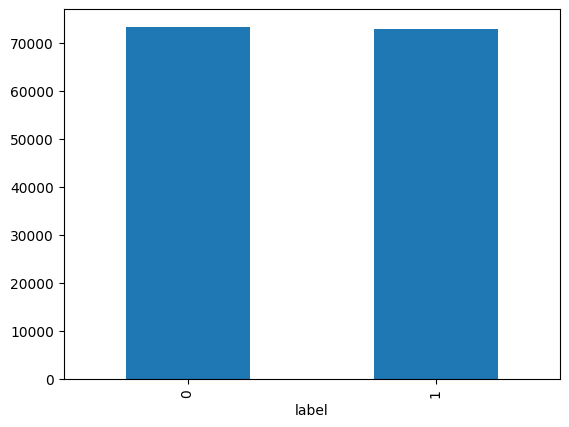

In [8]:
import matplotlib.pyplot as plt

train_data['label'].value_counts().plot(kind = 'bar')

plt.show()



In [9]:
train_data.loc[train_data.document.isnull()]

,document,label
25857,NaN,1


In [10]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거

train_data.isnull().values.any()

False

In [11]:
#특수문자,기호 제거

train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

train_data[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [12]:
import numpy as np

#공백 제거

train_data['document'] = train_data['document'].str.replace('^ +', "")

train_data['document'].replace('', np.nan, inplace=True)

train_data.isnull().sum()



document    0
label       0
dtype: int64

In [13]:
train_data.loc[train_data.document.isnull()][:3]



,document,label


In [14]:
#null 샘플 제거

train_data = train_data.dropna(how = 'any')

len(train_data)

146157

In [15]:
# test_data에도 동일한 과정 적용

test_data.drop_duplicates(subset = ['document'], inplace=True)

test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

test_data['document'] = test_data['document'].str.replace('^ +', "")

test_data['document'].replace('', np.nan, inplace=True)

test_data = test_data.dropna(how='any')

len(test_data)

49147

In [16]:
# 불용어 사전

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [17]:
from konlpy.tag import Okt

okt = Okt()

X_train = []  

#형태소 분석

#for sentence in train_data['document']:

for sentence in train_data['document'][:10000]:    

    temp_X = okt.morphs(sentence, stem=True) # 토큰화

    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거

    X_train.append(temp_X)

In [18]:
print(X_train[:3])



[['아', '더빙', '..', '진짜', '짜증나다', '목소리'], ['흠', '...', '포스터', '보고', '초딩', '영화', '줄', '....', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [19]:
# 테스트 데이터에 대한 토큰화

X_test = []

#for sentence in test_data['document']:

for sentence in test_data['document'][:10000]:    

    temp_X = okt.morphs(sentence, stem=True)

    temp_X = [word for word in temp_X if not word in stopwords]

    X_test.append(temp_X)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 정수 인코딩

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

#print(tokenizer.word_index)

In [21]:
# 출현빈도가 3회 미만인 단어들

threshold = 3

total_cnt = len(tokenizer.word_index) # 단어수

rare_cnt = 0

total_freq = 0

rare_freq = 0

for key, value in tokenizer.word_counts.items():

    total_freq = total_freq + value

    if(value < threshold):

        rare_cnt = rare_cnt + 1

        rare_freq = rare_freq + value

print(total_cnt) #단어집합 크기

print(rare_cnt) #희귀단어수

13345
8891


In [22]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4455


In [23]:
tokenizer = Tokenizer(vocab_size)

tokenizer.fit_on_texts(X_train) #텍스트를 숫자 시퀀스로 변환

X_train = tokenizer.texts_to_sequences(X_train)

X_test = tokenizer.texts_to_sequences(X_test)

In [24]:
print(X_train[:3])

[[59, 724, 4, 21, 259, 831], [725, 6, 378, 48, 678, 2, 178, 41, 1928, 29, 942, 769, 26], [373, 1613, 3462, 3, 249, 13]]


In [25]:
y_train = np.array(train_data['label'][:10000])

y_test = np.array(test_data['label'][:10000])

In [26]:
max_len=max(len(l) for l in X_train) #리뷰의 최대 길이

In [27]:
cnt = 0

for s in X_train:

  if(len(s) <= 30):

      cnt = cnt + 1

#최대 길이 이하인 샘플의 비율

(cnt / len(X_train))*100

93.58

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = max_len)

X_test = pad_sequences(X_test, maxlen = max_len)

In [29]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Embedding, Conv1D, Dense, Flatten, MaxPooling1D

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import load_model


model = Sequential()

model.add(Embedding(vocab_size, 100, input_length = max_len))

model.add(Conv1D(filters = 64, kernel_size = 5, padding = 'same',activation = 'relu', strides = 1))

model.add(Conv1D(filters = 32, kernel_size = 4, padding = 'same',activation = 'relu', strides = 1))

model.add(Conv1D(filters = 16, kernel_size = 3, padding = 'same',activation = 'relu', strides = 1))

model.add(MaxPooling1D(5))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['acc'])

In [30]:

es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10


: 

: 

In [ ]:
loaded_model = load_model('CNN_model.h5')

loaded_model.evaluate(X_test, y_test)

In [ ]:
def review_predict(new_sentence):

  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화

  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거

  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩

  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩

  score = float(model.predict(pad_new)) # 예측

  if(score > 0.5):

    print(f"{score * 100:.2f}% 확률로 긍정 리뷰입니다.\n")

  else:

    print(f"{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다.\n")

In [ ]:
review_predict('연기는 잔잔하게 볼 만 합니다')

In [ ]:
review_predict('영화의 주제가 뭔지 모르겠음')

In [ ]:
review_predict('익살스런 연기가 돋보였던 영화')

In [ ]:
review_predict('기대보다는 스토리가 큰 감흥은 없습니다')